# MTH9875 Homework 5

Assigned: September 28, 2017.
Due: October 12, 2017 by 6pm.

Late homework **will not be accepted**.

<font color = "red">Homework is to be done by each student individually.  To receive full credit, you must email a completed copy of this iPython notebook to Victor Istratov (stavka@gmail.com), Yassine Ghalem (yassine.ghalem@gmail.com) and Jim Gatheral (jim.gatheral@gmail.com) by the due date and time.  All R-code must run correctly and solutions must be written up neatly in Markdown/LaTeX format.

* **Author: Hongchao Pan**
* Kernel Version: R 3.3.2
* Packages/Libraries: repr, stinepack
* Notes:
    * Q3(c): Drop 1st expiry (required in the question) instead of 1st 3 expiries as did in Lecture 5.


In [1]:
# Record the time
ptm<-proc.time()

## An empirical SPX volatility surface

Friday, March 18, 2016 was triple witching day for SPX options and futures.  Thus, the volatility surface as of the close on the 17th, that includes March options expiring the following morning, should have a shape just as interesting as the one shown in Figure 3.2 of The Volatility Surface.  And there are many more expirations.  Note in particular that a large share of the total volume in SPX options is now in weeklies.

### 1. (3 points)
$$
\newcommand{\supp}{\mathrm{supp}}
\newcommand{\E}{\mathbb{E} }
\def\Cov{{ \mbox{Cov} }}
\def\Var{{ \mbox{Var} }}
\newcommand{\1}{\mathbf{1} }
\newcommand{\PP}{\mathbb{P} }
%\newcommand{\Pr}{\mathrm{Pr} }
\newcommand{\QQ}{\mathbb{Q} }
\newcommand{\RR}{\mathbb{R} }
\newcommand{\DD}{\mathbb{D} }
\newcommand{\HH}{\mathbb{H} }
\newcommand{\spn}{\mathrm{span} }
\newcommand{\cov}{\mathrm{cov} }
\newcommand{\sgn}{\mathrm{sgn} }
\newcommand{\HS}{\mathcal{L}_{\mathrm{HS}} }
%\newcommand{\HS}{\mathrm{HS} }
\newcommand{\trace}{\mathrm{trace} }
\newcommand{\LL}{\mathcal{L} }
%\newcommand{\LL}{\mathrm{L} }
\newcommand{\s}{\mathcal{S} }
\newcommand{\ee}{\mathcal{E} }
\newcommand{\ff}{\mathcal{F} }
\newcommand{\hh}{\mathcal{H} }
\newcommand{\bb}{\mathcal{B} }
\newcommand{\dd}{\mathcal{D} }
\newcommand{\g}{\mathcal{G} }
\newcommand{\half}{\frac{1}{2} }
\newcommand{\T}{\mathcal{T} }
\newcommand{\bi}{\begin{itemize}}
\newcommand{\ei}{\end{itemize}}
\newcommand{\beq}{\begin{equation}}
\newcommand{\eeq}{\end{equation}}
\newcommand{\beas}{\begin{eqnarray*}}
\newcommand{\eeas}{\end{eqnarray*}}
$$
Derive the put-call parity formula for European options in the form

$$
C-P=PV\,(F-K)
$$ 

where $C$ is the call price, $P$ is the put price, $F$ is the forward price, $K$ is the strike and $PV$ is the discount factor.

### Answer of Q1

* Construct the following two portfolio:
    * Portfolio 1: Long 1 unit call and short 1 unit put with strike K and spot price S.
    * Portfolio 2: Long 1 share the underlying asset and borrow K units of zero-coupon bond with $\$1$ at maturity.
    
* Based on the construction, we know the two portfolio both have payoff $S_T-K$ at maturity.

* Based on the non-arbitrage condition that two portfolio have same payoff at maturity should have same price at any time before maturity $T$.

* With notation that, $PV$ is the discount factor, $F$ is the forward price, and $B$ is the price of zero-coupon bond, then we have:

\begin{eqnarray*}
C-P &=& S-K\times B\\
&=&PV\times F- PV\times K\\
&=&PV(F-K)
\end{eqnarray*}

### Download some code

The following code sources `BlackScholes.R` which has the Black-Scholes formula and implied volatility computation and `Heston2.R` which has in particular the `impvolHeston` function.

In [2]:
#install.packages("stinepack")

In [1]:
# Load required packages
library("stinepack")

In [2]:
#download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2017/09/rFilesHW5.zip", destfile="rFilesHW5.zip")
#unzip(zipfile="rFilesHW5.zip")

source("BlackScholes.R")
source("Heston2.R")
source("plotIvols.R")

### 2.  (8 points) 

Given $n$ option strikes from a given expiration $T$, write R-code to take the $2\,n$ option prices and return $F$ and $PV$ for that expiration (obviously you need at least two strikes).  Test your code on the following prices for European options expiring in 36 days:

| Strike | Call price | Put price |
|--------|---------:|----------:|
| 1190 | 52.23 | 37.51 | 
| 1195 | 49.11 | 39.34 | 
| 1200 | 46.59 | 41.52 | 
| 1205 | 43.13 | 42.55 | 
| 1210 | 40.21 | 45.40 | 
| 1215 | 37.45 | 47.57 | 
  



With the resulting values of $F$ and $PV$, and using the implied volatility calculator in `BlackScholes.R`, compute implied volatilities for the above options.  Display these by adding a column to the above table.

### Answer of Q2

In [3]:
# Retrive given data from the table
T <- 36*1.0/365
strikes <- c(1190,1195,1200,1205,1210,1215)
C <- c(52.23,49.11,46.59,43.13,40.21,37.45)
P <- c(37.51,39.34,41.52,42.55,45.40,47.57)

In [4]:
# Compute F and PV based on the Put-call parity in Q1
# C-P=PV(F-K)=PV*F-PV*K
# Compute the PV and F based on the linear regression
reg <- lm((C-P)~strikes)
PV <- -reg$coefficients[[2]]
F <- reg$coefficients[[1]]/PV

cat("The discount factor PV is: ",PV,"\n")
cat("The future price F is: ",F,"\n")


The discount factor PV is:  0.9918286 
The future price F is:  1204.992 


In [5]:
# Compute the implied vol
S0 <- F*PV
r <- log(PV)/(-T)
ImpliedVols <- BSImpliedVolCall(S0,strikes,T,r,C)
Q2_data <- data.frame(cbind(strikes, C, P, ImpliedVols))
names(Q2_data) <- c("Strike","Call price","Put price","Implied Vol")
Q2_data

Strike,Call price,Put price,Implied Vol
1190,52.23,37.51,0.2984816
1195,49.11,39.34,0.2950218
1200,46.59,41.52,0.2950292
1205,43.13,42.55,0.2881578
1210,40.21,45.40,0.2843159
1215,37.45,47.57,0.2809337


### Download code for problem 3.

The following code loads the file *spxData110915.rData* into your working directory and sources *plotIvols.R* which has implied volatility smile plotting functionality.

In [8]:
download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2017/09/spxOptionMetrics.rData_.zip", destfile="spxOptionMetrics.rData.zip")
unzip(zipfile="spxOptionMetrics.rData.zip")

In [6]:
library(repr)
options(repr.plot.width=10,repr.plot.height=7)

*spxOptionMetrics.rData* contains the data frame `spxData20160317` which has all SPX options closing prices as of March 17, 2016.  Data is from OptionMetrics (http://www.optionmetrics.com/index.html) via WRDS (http://wrds-web.wharton.upenn.edu/wrds/).

Note that SPX strike prices are out by a factor of 1000.

In [7]:
load("spxOptionMetrics.rData")

# Check the data
head(spxData20160317[,1:10])

,secid,date,symbol,symbol_flag,exdate,last_date,cp_flag,strike_price,best_bid,best_offer
1091361,108105,20160317,SPX 160318C1000000,1,20160318,20160315,C,1000000,1038.2,1045.5
1091362,108105,20160317,SPX 160318C1025000,1,20160318,NA,C,1025000,1013.2,1020.5
1091363,108105,20160317,SPX 160318C1050000,1,20160318,20150622,C,1050000,988.2,995.5
1091364,108105,20160317,SPX 160318C1075000,1,20160318,20160317,C,1075000,963.2,970.5
1091365,108105,20160317,SPX 160318C1100000,1,20160318,20160317,C,1100000,938.2,945.5
1091366,108105,20160317,SPX 160318C1125000,1,20160318,20150424,C,1125000,913.2,920.5


### 3.  (20 points) 

(a)
Write a function in R called `generateIvols` that inputs `spxData20160317` and outputs bid and offer implied volatilities for all strikes and expirations in a data frame that has the same format as the dataframe `spxOptData` from Lecture 5.


(b)
Plot your results using `plotIvols()`; your picture should look something like Figure 6 in the lecture slides (without the orange SVI fit of course).


### Answer of Q3

#### Answer of (a): generateIvols

In [8]:
# Get F and PV based on linear regression
F_PV_reg<-function(strikes,C,P){
    reg<-lm((C-P)~strikes)
    PV<--summary(reg)$coeff[2]
    F<-summary(reg)$coeff[1]/PV
    return(cbind(F,PV))
}

# Define the generateIvols function
generateIvols<-function(df){
    # df is the input dataset
    res<-data.frame()
    
    exdates<-unique(df[,"exdate"])
    for (edate in exdates){
        data.subset<-subset(df,exdate==edate)
        
        strikes<-unique(data.subset[,"strike_price"])/1000
        calls<-subset(data.subset,cp_flag=="C")
        puts<-subset(data.subset,cp_flag=="P")
        C<-(calls[,"best_bid"]+calls[,"best_offer"])/2
        P<-(puts[,"best_bid"]+puts[,"best_offer"])/2
        F_PV<-F_PV_reg(strikes,C,P) # Call the regression function to compute F and PV
        
        F<-F_PV[1]
        PV<-F_PV[2]
        S0<-F*PV
        Texp<-(as.numeric(strptime(edate, format="%Y%m%d")-strptime(df[1,"date"], format="%Y%m%d")))/365
        r <- -log(PV)/Texp
        
        res.subset<-data.frame(matrix(ncol = 7, nrow = dim(calls)[1]))
        colnames(res.subset)<-c("Expiry","Texp","Strike","Bid","Ask","Fwd")
        res.subset[,"Expiry"]<-calls[,"exdate"]
        res.subset[,"Strike"]<-calls[,"strike_price"]/1000
#        res.subset[,"CallMid"]<-(calls[,"best_bid"]+calls[,"best_offer"])/2
        res.subset[,"Texp"]<-rep(Texp,dim(calls)[1])
        res.subset[,"Fwd"]<-rep(F,dim(calls)[1])
        
        for(i in 1:dim(calls)[1]){
            res.subset[i,"Bid"]<-BSImpliedVolCall(S0, res.subset[i,"Strike"], Texp, r, calls[i,"best_bid"])
            res.subset[i,"Ask"]<-BSImpliedVolCall(S0, res.subset[i,"Strike"], Texp, r, calls[i,"best_offer"])
            if(res.subset[i,"Bid"]<1e-9){
                res.subset[i,"Bid"]<-NA
 #               res.subset[i,"CallMid"]<-NA
            }
            if(res.subset[i,"Ask"]<1e-9){
                res.subset[i,"Ask"]<-NA
  #              res.subset[i,"CallMid"]<-NA
            }
        }
        res<-rbind(res,res.subset)
    }
    return(res)
}


In [9]:
# Check the definded function
Q3_res <- generateIvols(spxData20160317)

In [10]:
# Since the whole dataframe contains too many rows, only output the head of the dataframe
head(Q3_res)

Expiry,Texp,Strike,Bid,Ask,Fwd,NA
20160318,0.002739726,1000,NA,6.662740,2041.93,NA
20160318,0.002739726,1025,NA,6.453306,2041.93,NA
20160318,0.002739726,1050,NA,6.248813,2041.93,NA
20160318,0.002739726,1075,NA,6.049000,2041.93,NA
20160318,0.002739726,1100,NA,5.853625,2041.93,NA
20160318,0.002739726,1125,NA,5.662460,2041.93,NA


#### Answer of (b): plotIvols

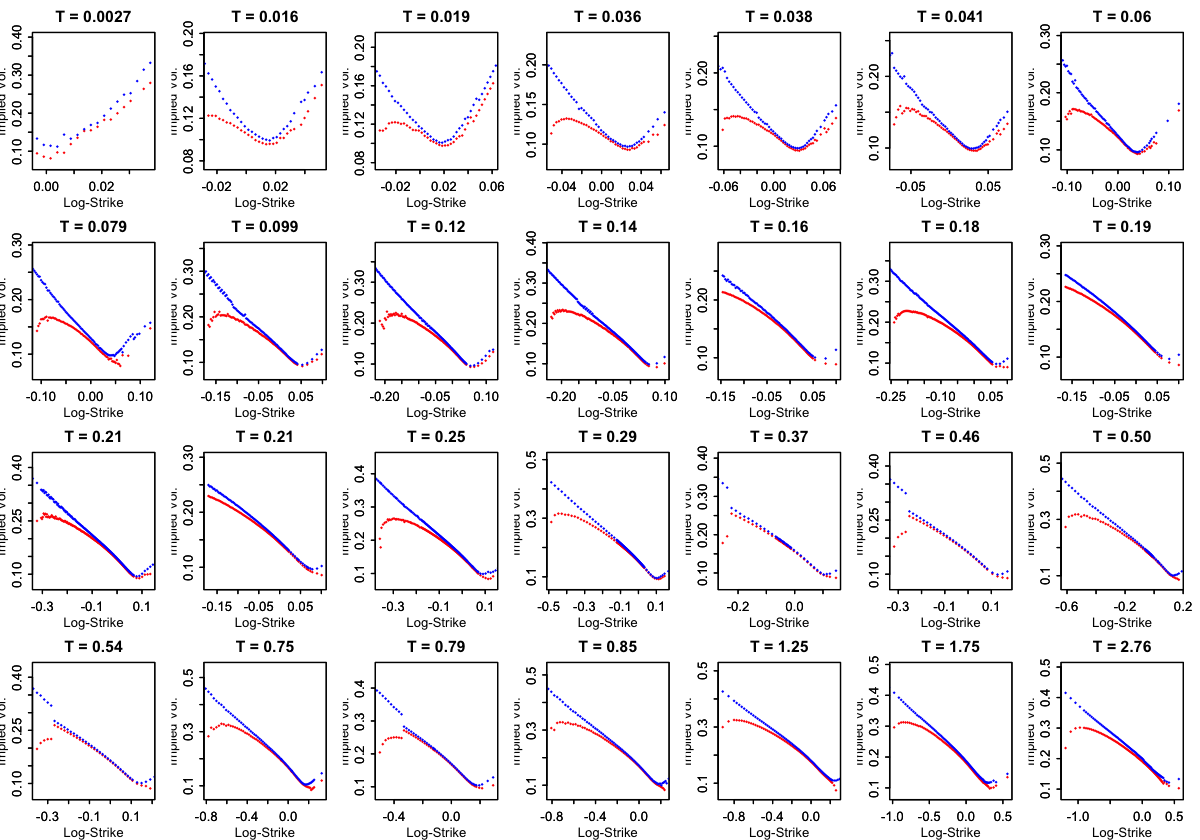

In [11]:
volOrder <- Q3_res[order(Q3_res[,"Texp"],Q3_res[,"Strike"]),]
Q3_res_Ivols <- plotIvols(volOrder)

SPX impied volatility as of March 17, 2016. Bid vols are in red; offer vols are in blue.

<font color=red>COMMENT: the red lines diverge too strongly. -5pts</font>

## Approximate calibration of the Heston parameters

### 4.  (14 points) 

(a)
Using the Lecture 5 R-code as a base, write R-code to fit the approximate formula (23) for ATM variance skew to the empirical ATM skew estimates in Table 2 of Lecture 5. 


(b)
Using your code from (a) and all the points, assuming $\rho=-0.7$, estimate the Heston parameters $\lambda$ and $\eta$. How similar are your estimates the Heston parameters $\lambda$ and $\eta$ to the estimates from September 2005 listed in Table 3 of Lecture 5?  Are Heston fitted parameters stable over time?


(c)
Repeat (a) and (b) dropping the first expiries, as in Lecture 5. <font color='blue'>drop 1st three expiries in lecture 5?</font>


(d) Fit a power law of the form $A/T^\alpha$ to the ATM variance skew data (all points).


(e) 
Superimpose graphs of your resulting ATM skew fits from (b), (c), and (d) to generate a plot like Figure 8 of Lecture 5.

(f)
Using the Lecture 5 R-code as a base, write R-code to fit the approximate formula (20) 

$$
\left.{\sigma_{BS}(K,T)^2}\right|_{K=F_T} \approx \left( {{ v - \bar v'}}\right)\frac{1- e^{ -
\lambda' \,T}}{\lambda' \,T} + \bar v'.
$$

for ATM variance to the empirical ATM variance estimates in Table 2 of Lecture 5.

(g) Graph the empirical ATM variance vs time to expiration and your fit from (f) to generate a plot like Figure 9 of Lecture 5.

### Answer of Q4

#### Answer of (a): Fit formula (23) in lecture 5

* Get the Table 2 from Lecture #5 as follows:

### Empirical ATM levels and skews

| Expiration | Time to expiry | ATM Variance | ATM Skew |
|------------|----------------|-------------:|---------:|
| Sep-11     | 1 day          | 0.0494       | -0.7343  |
| Oct-11     | 1 month        | 0.0831       | -0.5164  |
| Nov-11     | 2 months       | 0.0841       | -0.4439  |
| Dec-11     | 3 months       | 0.0825       | -0.3741  |
| Mar-12     | 6 months       | 0.0786       | -0.2525  |
| Jun-12     | 9 months       | 0.0761       | -0.2122  |
| Dec-12     | 15 months      | 0.0728       | -0.1658  |
| Jun-13     | 21 months      | 0.0699       | -0.1339  |
| Dec-13     | 27 months      | 0.0692       | -0.1185  |

Table 2: At-the-money SPX variance levels and variance skews as of 3pm on September 15, 2011, the day before expiration.

In [15]:
# Retrive the data from Table 2
atmSkews <- c(-0.7343,-0.5164,-0.4439,-0.3741,-0.2525,-0.2122,-0.1658,-0.1339,-0.1185)
atmVars <- c(0.0494, 0.0831, 0.0841, 0.0825, 0.0786, 0.0761, 0.0728, 0.0699, 0.0692)
texp <- c(1/365.0, 1/12.0, 2/12.0, 3/12.0, 6/12.0, 9/12.0, 15/12.0, 21/12.0, 27/12.0)

In [16]:
# Leverage the code from Lecture #5
skewHeston <- function(skewParams,texp)
{
    rhoeta <- skewParams[1]
    lam <- skewParams[2]
    lt <- lam*texp
    skew <- rhoeta/lt*(1-(1-exp(-lt))/lt)	
    
    return(skew)   
}

skewObjective1 <- function(skewParams)
{
    
    skewModel <- skewHeston(skewParams,texp)
    skewEmpirical <- atmSkews
    obj <-sum((skewModel-skewEmpirical)^2)
    
    return(obj*1000000)    
}

In [17]:
# Same from Lecture #5
res1 <- optim(c(-.7*.39,1.15),skewObjective1)
fit1 <- res1$par 

#### Answer of (b):

In [18]:
# From (a) and rho=-0.7, Then we have:
rhoeta <- fit1[1]
eta <- rhoeta / (-0.7)
lambda <- fit1[2]
cat("eta is: ",eta,"\n")
cat("lambda is: ",lambda,"\n")

eta is:  1.983844 
lambda is:  7.996911 


* **Recall from lecture 5, we have:**

* Heston fit to the SPX implied volatility surface

<table>
<tr>
    <td>$v$</td>
    <td><font color="white">-<font color="black">0.0174</td>
</tr>
<tr>
    <td>$\bar{v}$</td>
    <td><font color="white">-<font color="black">0.0354</td>
</tr>
<tr>
    <td>$\eta$</td>
    <td><font color="white">-<font color="black">0.3877</td>
</tr>
<tr>
    <td>$\rho$</td>
    <td>-0.7165</td>
</tr>
<tr>
    <td>$\lambda$</td>
    <td><font color="white">-<font color="black">1.3253</td>
</tr>
</table>

Table 3: Heston fit to the SPX surface as of the close on September 15, 2005.

* As we can see the $\eta$ and $\lambda$ we fitted here is much different than what we have in Table 3 of Lecture #5. Therefore, Heston fitted parameters are not stable over time.

#### Answer of (c): Repeat (a) and (b) with dropping 1st expiries.

* **The lecture drop 1st 3 points, not 1st expiry. Therefore, I dropped 1st 3 points as in Lecture 5.**

In [19]:
# Drop 1st points
skewObjective2 <- function(skewParams){
    
    skewModel <- skewHeston(skewParams,texp[-1])
    skewEmpirical <- atmSkews[-1]
    obj <-sum((skewModel-skewEmpirical)^2)
    return(obj*1000000)
    
    }

res2 <- optim(c(-.7*.39,1.15),skewObjective2)
fit2 <- res2$par

In [20]:
rhoeta2 <- fit2[1]
eta2 <- rhoeta2 / (-0.7)
lambda2 <- fit2[2]
cat("Updated eta is: ",eta2,"\n")
cat("Updated lambda is: ",lambda2,"\n")

Updated eta is:  1.656675 
Updated lambda is:  5.326391 


#### Answer of (d): Fit the power law

In [21]:
skewObjectivePL <- function(PLParams){
    A<-PLParams[1]
    alpha<-PLParams[2]
    
    skewModel <- A/(texp^alpha)
    skewEmpirical <- atmSkews
    obj <-sum((skewModel-skewEmpirical)^2)
    return(obj*1000000)
    
    }

resPL <- optim(c(-0.2,0.4),skewObjectivePL)
(fitPL <- resPL$par)

[1] -0.2378829  0.2021213

In [22]:
cat("The parameter alpha is: ", fitPL[2],"\n")

The parameter alpha is:  0.2021213 


#### Answer of (e): Reproduce Figure 8 in Lecture 5

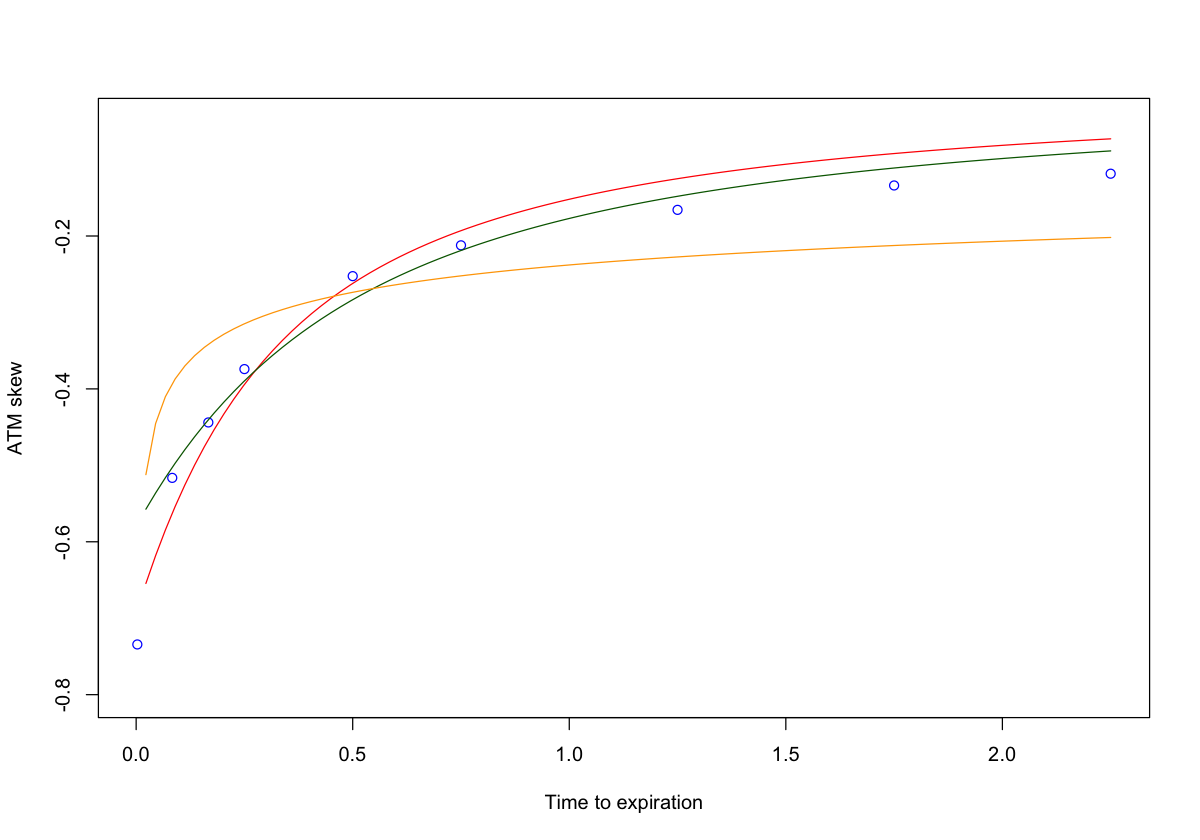

In [23]:
plot(texp,atmSkews,col="blue",ylim=c(-.80,-.05),xlab="Time to expiration",ylab="ATM skew")
curve(skewHeston(fit1,x),from=0,to=27/12.0,col="red",add=TRUE)
curve(skewHeston(fit2,x),from=0,to=27/12.0,col="dark green",add=TRUE)
curve(fitPL[1]/(x^fitPL[2]),from=0,to=27/12.0,col="orange",add=TRUE)

SPX ATM skew vs time to expiry. Blue points are empirical skews; the
red line is a fit of (23) to all empirical skews; the dark
green fit excludes the first data point; the orange line is a
power-law fit.

#### Answer of (f): Fit formula (20) in Lecture 5

In [24]:
# Levrage the code of Formula (20) from Lecture 5
varHeston <- function(varParams,texp){
    
    v <- varParams[1]
    vbar <- varParams[2]
    lam <- varParams[3]
    lt <- lam*texp
    var <- vbar + (v-vbar)*(1-exp(-lt))/lt
    return(var)
    
}

# Drop 1st point
varObjective <- function(varParams){
    
    varModel <- varHeston(varParams,texp[-1])
    varEmpirical <- atmVars[-1]
    obj <-sum((varModel-varEmpirical)^2)
    return(obj*1000000)
    
}

In [25]:
# Sampe optimize parameters from Lecture 5
(res <- optim(c(0.04,0.04,1.15),varObjective))
fitVar <- res$par

$par
[1] 0.08538816 0.05965940 1.20859926

$value
[1] 3.852882

$counts
function gradient 
      80       NA 

$convergence
[1] 0

$message
NULL


#### Answer of (g): Reproduce Figure 9

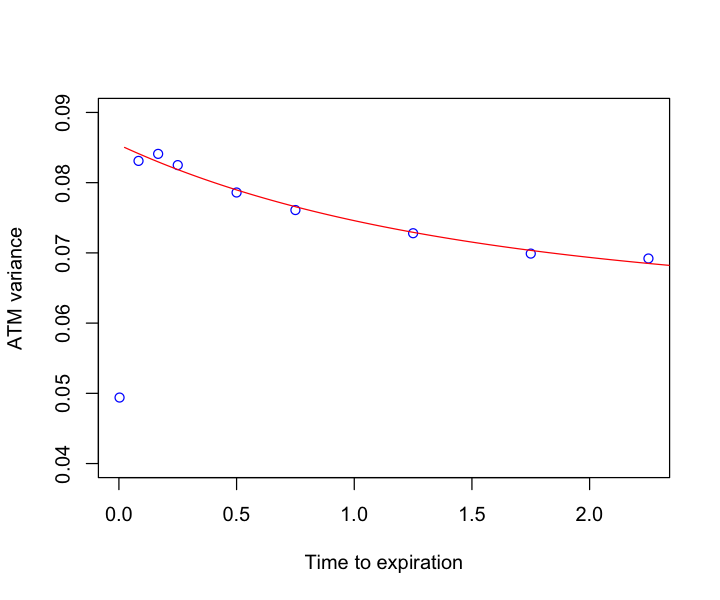

In [26]:
# Plot the ATM variance vs Time to expiration
options(repr.plot.width=6,repr.plot.height=5)
plot(texp,atmVars,col="blue",ylim=c(0.04,0.09),xlab="Time to expiration",ylab="ATM variance")
curve(varHeston(fitVar,x),from=0,to=2.4,col="red",add=TRUE)

Blue points are empirical SPX ATM variances; the red line is a fit of
the approximate ATM variance formula (20)

### 5.  (12 points) 

For the following problem, use the Heston parameter set

$$
\rho=-0.7;\,\eta = 2.0;\,\lambda=2.0;\,v=0.015;,\bar v=0.06.
$$

(a)
Amend the `plotIvols()` code (renaming it `plotIvolsHeston(..)`) to take data and the above Heston parameters as input and output the empirical smiles with Heston smiles superimposed.  You should obtain a picture like Figure 4 or Figure 7 of Lecture 5 (except that Heston doesn't fit!). (You may have to vectorize the `impvolHeston` function to get this to work in the iPython notebook.)

(b) 
Use the `slices=5:6` optional argument in the call to your function to zoom in on slices 5 and 6.

(c) Does the Heston model fit the observed volatility surface?  (Hint: Focus on shorter expirations).

### Answer of Q5 

#### Answer of (a): plotIvols

In [27]:
# Define the plotIvolsHeston based on plotIvols with given Heston params
plotIvolsHeston <- function(ivolData,paramsHeston,slices=NULL){

    bidVols <- as.numeric(ivolData$Bid);
    askVols <- as.numeric(ivolData$Ask);
    expDates <- unique(ivolData$Texp);
    nSlices <- length(expDates);
    if(!is.null(slices)) {nSlices <- length(slices)} else {slices <- 1:nSlices};
    colnum <- sqrt(nSlices*2);
    rows <- round(colnum/2,0);
    columns <- round(colnum,0);
    while(rows*columns < nSlices) {rows <- rows+1;}

    atmVol <- numeric(nSlices);
    atmSkew <-numeric(nSlices);

    # vectorize the impvolHeston function 
    volHeston <- function(k,t){impvolHeston(paramsHeston)(k,t)}
    
    ###############################################################################################################
    #Plot all the slices
    par(mfrow=c(rows,columns),mex=0.5)
    for (slice in slices){
            t <- expDates[slice];
            texp <- ivolData$Texp;
            bidVol <- bidVols[texp==t];
            askVol <- askVols[texp==t];
            midVol <- (bidVol+askVol)/2;
            f <- (ivolData$Fwd[texp==t])[1];
            k <- log(ivolData$Strike[texp==t]/f); # Plot vs log-strike
            include <- !is.na(bidVol);
            kmin <- min(k[include]);
            kmax <- max(k[include]);
            ybottom <- 0.8*min(bidVol[include]);
            ytop <- 1.2*max(askVol[include],na.rm=T);
            xrange <- c(kmin,kmax);
            yrange <- c(ybottom,ytop);

            plot(k,bidVol,col="red",pch=18,cex=.5, xlim=xrange,ylim=yrange,main=paste("T =",format(t,digits=2,nsmall=2)),xlab="Log-Strike",ylab="Implied Vol.");
par(new=T);
plot(k,askVol,col="blue",pch=18,cex=.5,xlim=xrange,ylim=yrange,main=NA,xlab=NA,ylab=NA);

            vol <- function(logStrikes){sapply(logStrikes,function(log_k){volHeston(log_k,t)})}
    
            curve(vol(x),from=kmin,to=kmax,col="orange",lwd=2,add=TRUE);
                   
            # Compute and store empirical levels and skews
            kIn <- k[!is.na(midVol)];
            volIn <- midVol[!is.na(midVol)];
            volInterp <- function(xout){stinterp(x=kIn,y=volIn, xout)$y};
            atmVol[slice] <- volInterp(0);
            atmSkew[slice] <- (volInterp(0.01)-volInterp(-0.01))/0.02;
        }
    par(mfrow=c(1,1),mex=1)
    par(new=F)
    return(list(expiries=expDates,atmVol=atmVol,atmSkew=atmSkew));
}

In [28]:
# Given Heston parameters
# Create list based on impvolHeston/phiHeston function
paramsHeston <- list(lambda = 2.0,rho = -0.7,eta = 2.0 ,vbar = 0.06,v = 0.015) 

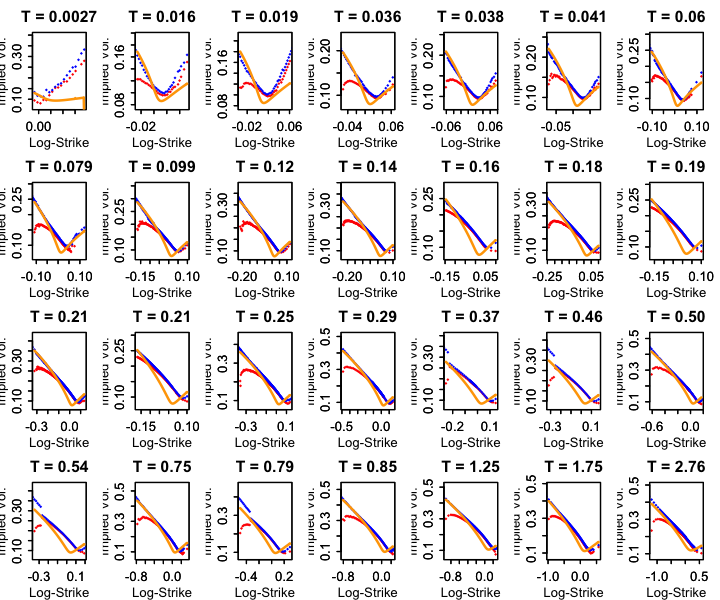

In [29]:
# Plot the vols based on the vol data in Q3
Q5_res_a <- plotIvolsHeston(volOrder, paramsHeston)

SPX impied volatility as of March 17, 2016. Bid vols are in red; offer vols are in blue; Heston fitted vols are in orange.SPX impied volatility as of March 17, 2016. Bid vols are in red; offer vols are in blue; Heston fitted vols are in orange.

#### Answer of (b): Use slice=5:6

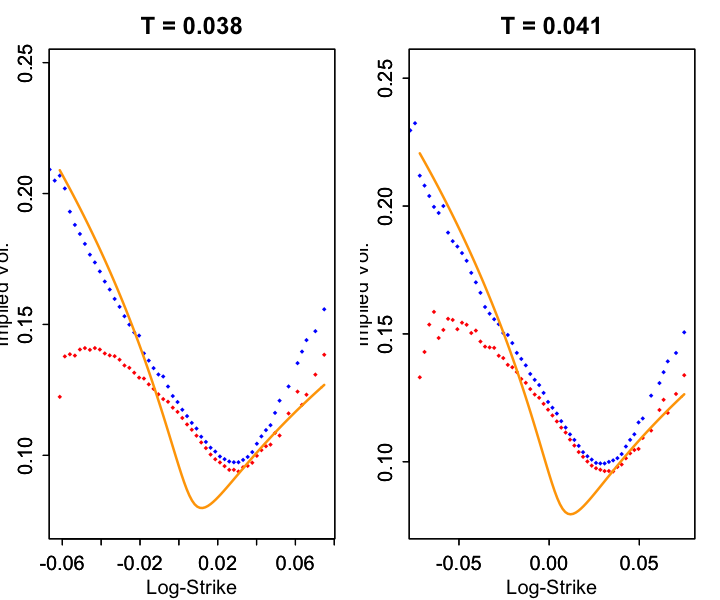

In [30]:
Q5_res_b <- plotIvolsHeston(volOrder, paramsHeston,slices = 5:6)

SPX impied volatility as of March 17, 2016 with slice 5 and 6. Bid vols are in red; offer vols are in blue; Heston fitted vols are in orange.

#### Answer of (c): Comment of Heston fit

* From the figures of (a) and (b), we can see that Heston model does not fit the observed volatility surface well with shorter expiration ($T < 0.5$ in this case)


* The fitted volatility surface from Heston model gets better as time to expiration increases ($T>0.5$ in this case).


* From the figures, we can also observe that the ATM implied vol computed from Heston model is always smaller (below in the figures) than the empirical vol. The reason caused by this may come from the approximation error of MLP.

In [31]:
print('The running time of the computation is: ')
proc.time()-ptm

[1] "The running time of the computation is: "


   user  system elapsed 
 25.773   0.845  31.782 